In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gc
from utils import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit = pd.read_csv('D:/Data Preparation final project group 2/Data/dseb63_credit_card_balance.csv')
train = pd.read_csv('D:/Data Preparation final project group 2/Data/dseb63_application_train.csv')

In [3]:
# Merge application train with credit_card_balance
train_copy = train[['TARGET', 'SK_ID_CURR']]
cc = pd.merge(train_copy, credit, on='SK_ID_CURR')
cc.head()

,TARGET,SK_ID_CURR,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,0,139008,1489396,-2,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
1,0,139008,1489396,-1,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
2,0,139008,1489396,-5,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
3,0,139008,1489396,-3,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0
4,0,139008,1489396,-4,0.0,270000,NaN,0.0,NaN,NaN,...,0.0,0.0,NaN,0,NaN,NaN,0.0,Active,0,0


In [4]:
cc, cat_cols = one_hot_encoder(cc, nan_as_category=False)
cc.rename(columns={'AMT_RECIVABLE': 'AMT_RECEIVABLE'}, inplace=True)
# Amount used from limit
cc['LIMIT_USE'] = cc['AMT_BALANCE'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
# Current payment / Min payment
cc['PAYMENT_DIV_MIN'] = cc['AMT_PAYMENT_CURRENT'] / cc['AMT_INST_MIN_REGULARITY']
# Late payment
cc['LATE_PAYMENT'] = cc['SK_DPD'].apply(lambda x: 1 if x > 0 else 0)
# How much drawing of limit
cc['DRAWING_LIMIT_RATIO'] = cc['AMT_DRAWINGS_ATM_CURRENT'] / cc['AMT_CREDIT_LIMIT_ACTUAL']
###-------BỔ SUNG-------------------------------------
cc['AMT_DRAWING_SUM'] = cc['AMT_DRAWINGS_ATM_CURRENT'] + cc['AMT_DRAWINGS_CURRENT'] + cc[
                                    'AMT_DRAWINGS_OTHER_CURRENT'] + cc['AMT_DRAWINGS_POS_CURRENT']
cc['BALANCE_LIMIT_RATIO'] = cc['AMT_BALANCE'] / (cc['AMT_CREDIT_LIMIT_ACTUAL'] + 0.00001)
cc['CNT_DRAWING_SUM'] = cc['CNT_DRAWINGS_ATM_CURRENT'] + cc['CNT_DRAWINGS_CURRENT'] + cc[
                                        'CNT_DRAWINGS_OTHER_CURRENT'] + cc['CNT_DRAWINGS_POS_CURRENT'] + cc['CNT_INSTALMENT_MATURE_CUM']
cc['MIN_PAYMENT_RATIO'] = cc['AMT_PAYMENT_CURRENT'] / (cc['AMT_INST_MIN_REGULARITY'] + 0.0001)
cc['PAYMENT_MIN_DIFF'] = cc['AMT_PAYMENT_CURRENT'] - cc['AMT_INST_MIN_REGULARITY']
cc['MIN_PAYMENT_TOTAL_RATIO'] = cc['AMT_PAYMENT_TOTAL_CURRENT'] / (cc['AMT_INST_MIN_REGULARITY'] +0.00001)
cc['AMT_INTEREST_RECEIVABLE'] = cc['AMT_TOTAL_RECEIVABLE'] - cc['AMT_RECEIVABLE_PRINCIPAL']
cc['SK_DPD_RATIO'] = cc['SK_DPD'] / (cc['SK_DPD_DEF'] + 0.00001)

In [5]:
cc_non_default = cc[cc['TARGET']==0]
cc_default = cc[cc['TARGET']==1]

Phân tích bảng credit_card_balance:
- AMT: Số lượng tiền rút
- CNT: Số lần rút
> Chia Data vào các nhóm chỉ số để đưa vào mô hình:
- Nhóm chỉ số Default Risk (rủi ro không trả được nợ): "SK_DPD", "SK_DPD_DEF"
- Nhóm chỉ số lợi nhuận ngân hàng thu về (Interest Earning): "AMT_RECEIVABLE_PRINCIPAL", "AMT_RECIVABLE", "AMT_TOTAL_RECEIVABLE" 
- Nhóm chỉ số mục đích vay tin dụng (Credit Purpose): AMT_DRAWINGS_ATM_CURRENT, AMT_DRAWINGS_CURRENT, AMT_DRAWINGS_OTHER_CURRENT, AMT_DRAWINGS_POS_CURRENT, CNT_DRAWINGS_ATM_CURRENT, CNT_DRAWINGS_CURRENT, CNT_DRAWINGS_OTHER_CURRENT, CNT_DRAWINGS_POS_CURRENT, CNT_INSTALMENT_MATURE_CUM

In [6]:
visualize = BivariateAnalysis()

# Nhóm chỉ số Default Risk

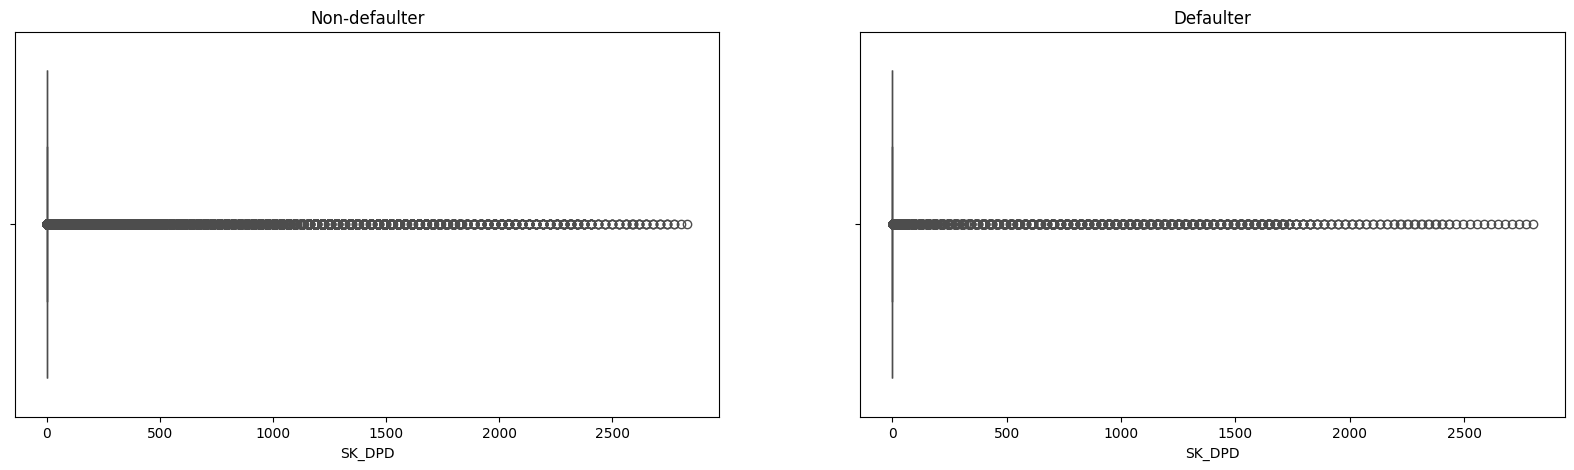

In [7]:
visualize.box_plot2(x='SK_DPD', df1= cc_non_default, df2= cc_default, width= 20, height=5)

--> Nhóm Non-default có xu hướng kéo dài thời gian trả nợ quá hạn [0, 1000] hơn so với nhóm default [0, 250]

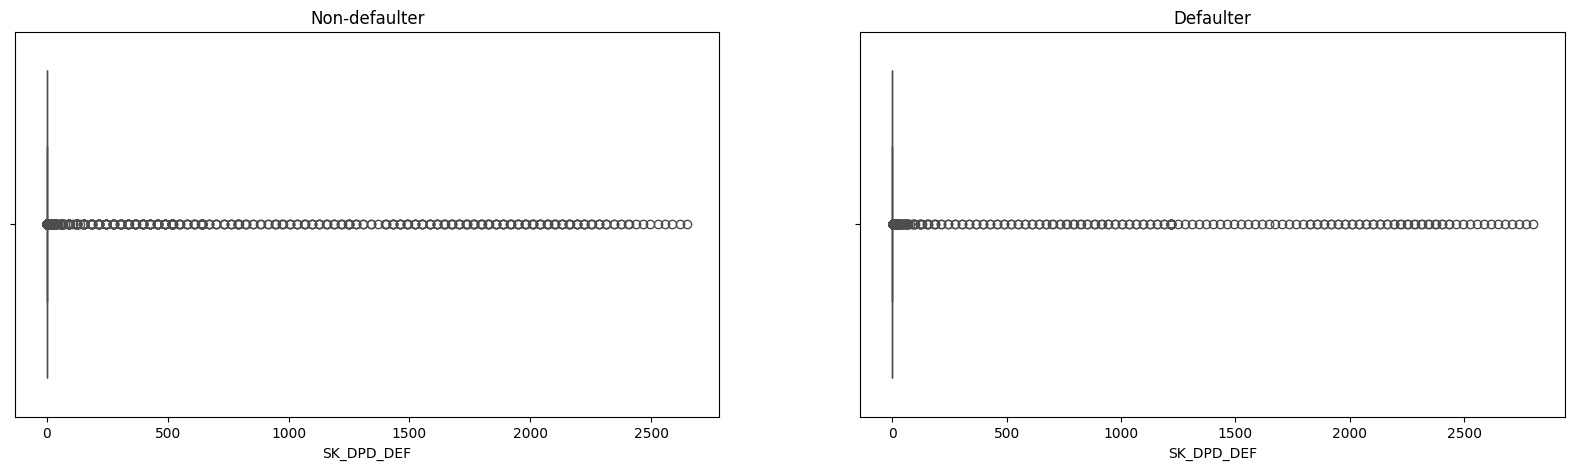

In [8]:
visualize.box_plot2(x='SK_DPD_DEF', df1= cc_non_default, df2= cc_default, width= 20, height=5)

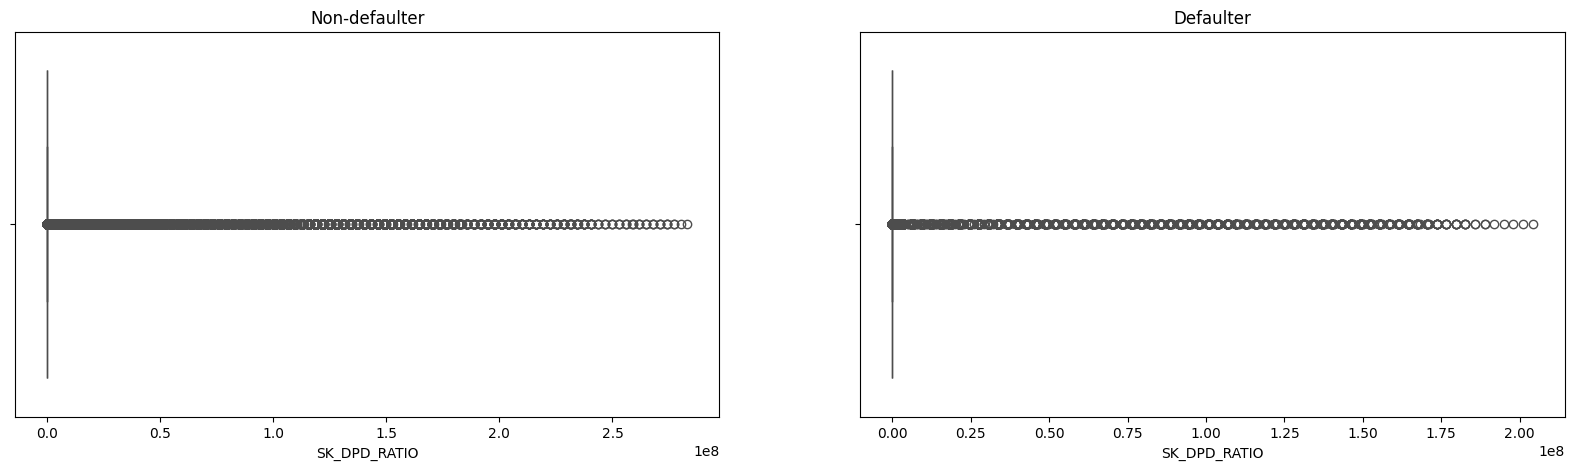

In [9]:
visualize.box_plot2(x='SK_DPD_RATIO', df1= cc_non_default, df2= cc_default, width= 20, height=5)

--> Nếu dùng hệ số ngày quá hạn khoản tất cả khoản vay / ngày quá hạn của khoản vay có khối lượng lớn
Nhóm non-default [0, 1.25] có hệ số scail rộng hơn nhóm default [0, 0.5]

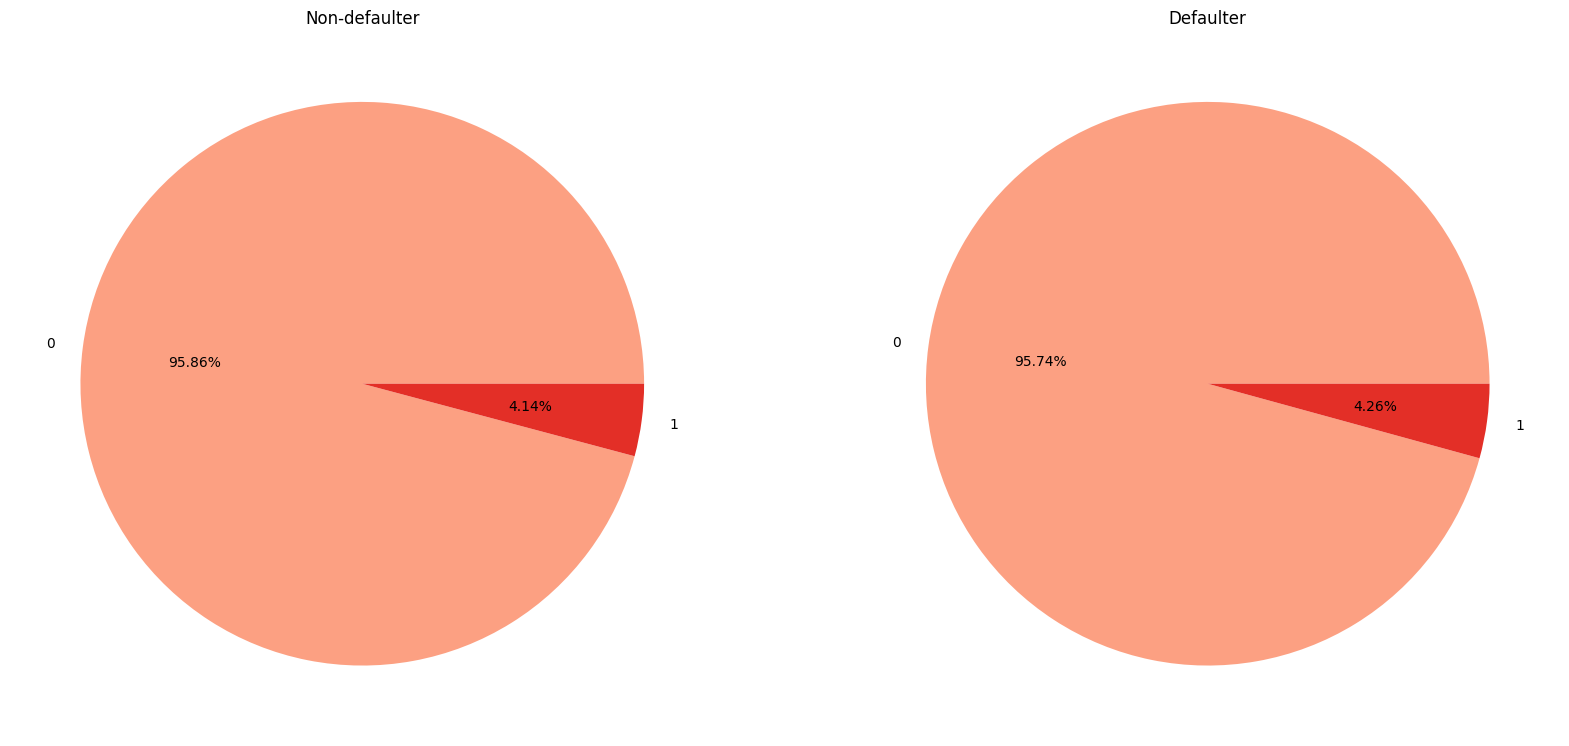

In [10]:
visualize.pie_plot(x='LATE_PAYMENT', df1=cc_non_default, df2=cc_default, width=20, height = 10)

# Nhóm chỉ số lợi nhuận ngân hàng thu về (Interest Earning)

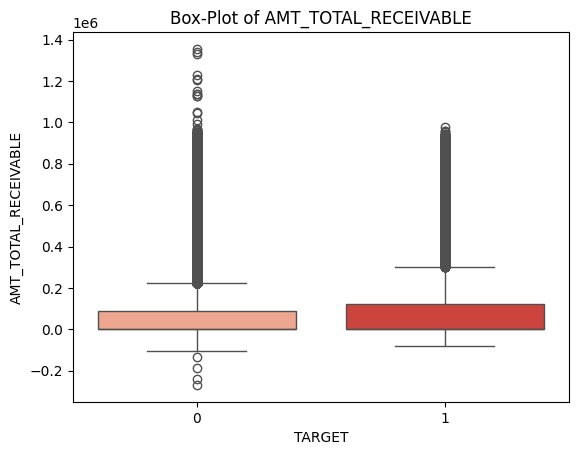

In [11]:
visualize.box_plot(y='AMT_TOTAL_RECEIVABLE', data_to_plot=cc)

--> Interquantile của nhóm non-default nhỏ hơn nhóm defaulter

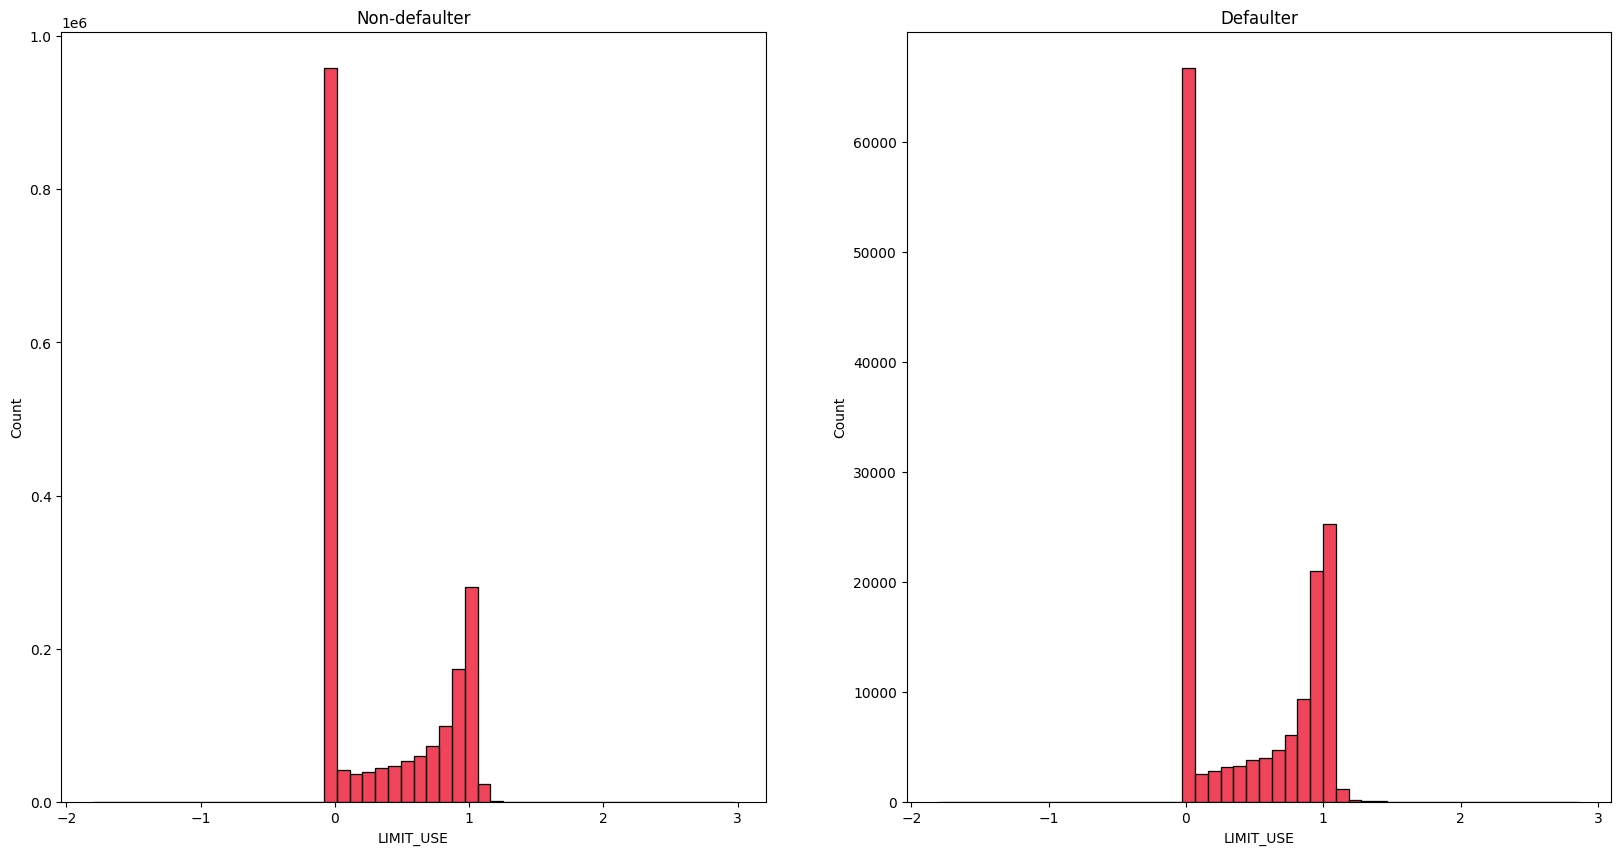

In [12]:
# Scale lại các outliners:
limit_use_non_default = cc_non_default[(cc_non_default['LIMIT_USE'] >= -2) & (cc_non_default['LIMIT_USE'] <= 3) ]
limit_use_default = cc_default[(cc_default['LIMIT_USE'] >= -2) & (cc_default['LIMIT_USE'] <= 5)]
visualize.hist_plot(x='LIMIT_USE', df1=limit_use_non_default, df2=limit_use_default, width= 20, height=10, bins= 50)

--> Phân phối chỉ số hạn mức trên 2 nhóm tương đối nhau

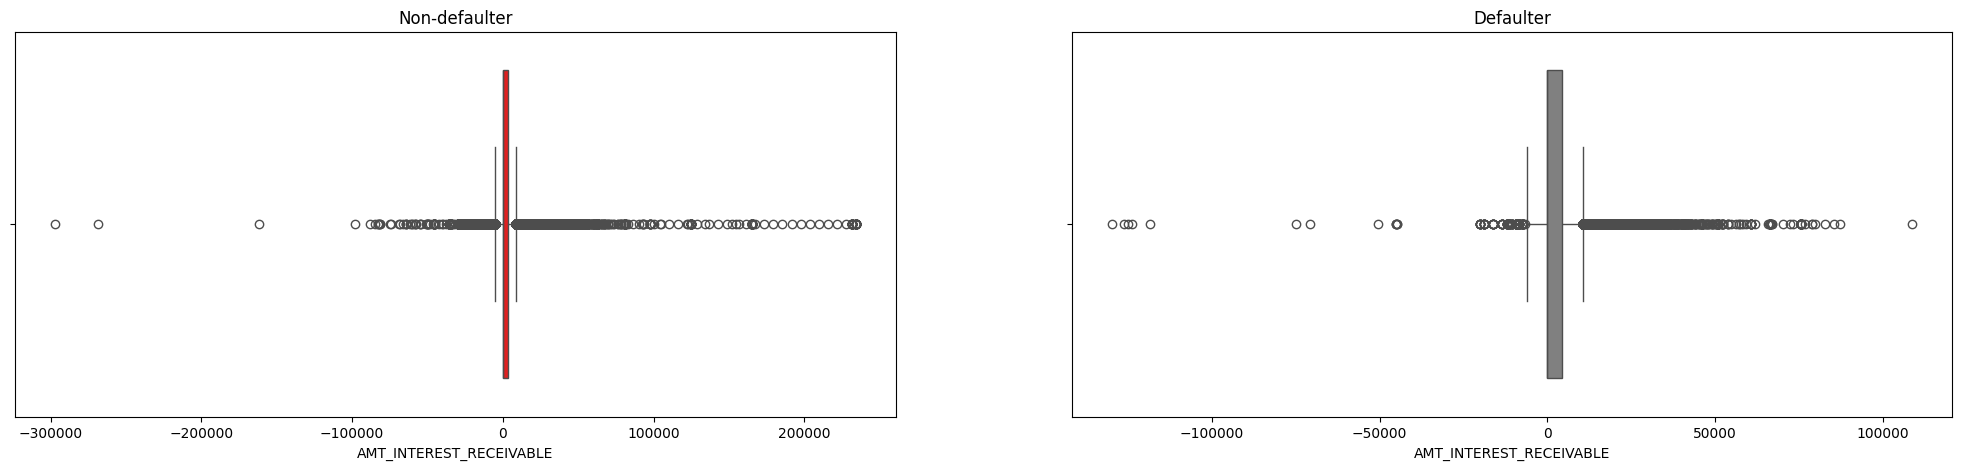

In [13]:
visualize.box_plot2(x='AMT_INTEREST_RECEIVABLE', df1= cc_non_default, df2=cc_default, width= 25, height= 5)

--> Nhóm non-default (nhỏ hơn - 25000 và lớn hơn 75000) khoản lãi suất phải trả nhiều hơn nhóm default

# Nhóm chỉ số mục đích vay tin dụng (Credit Purpose)

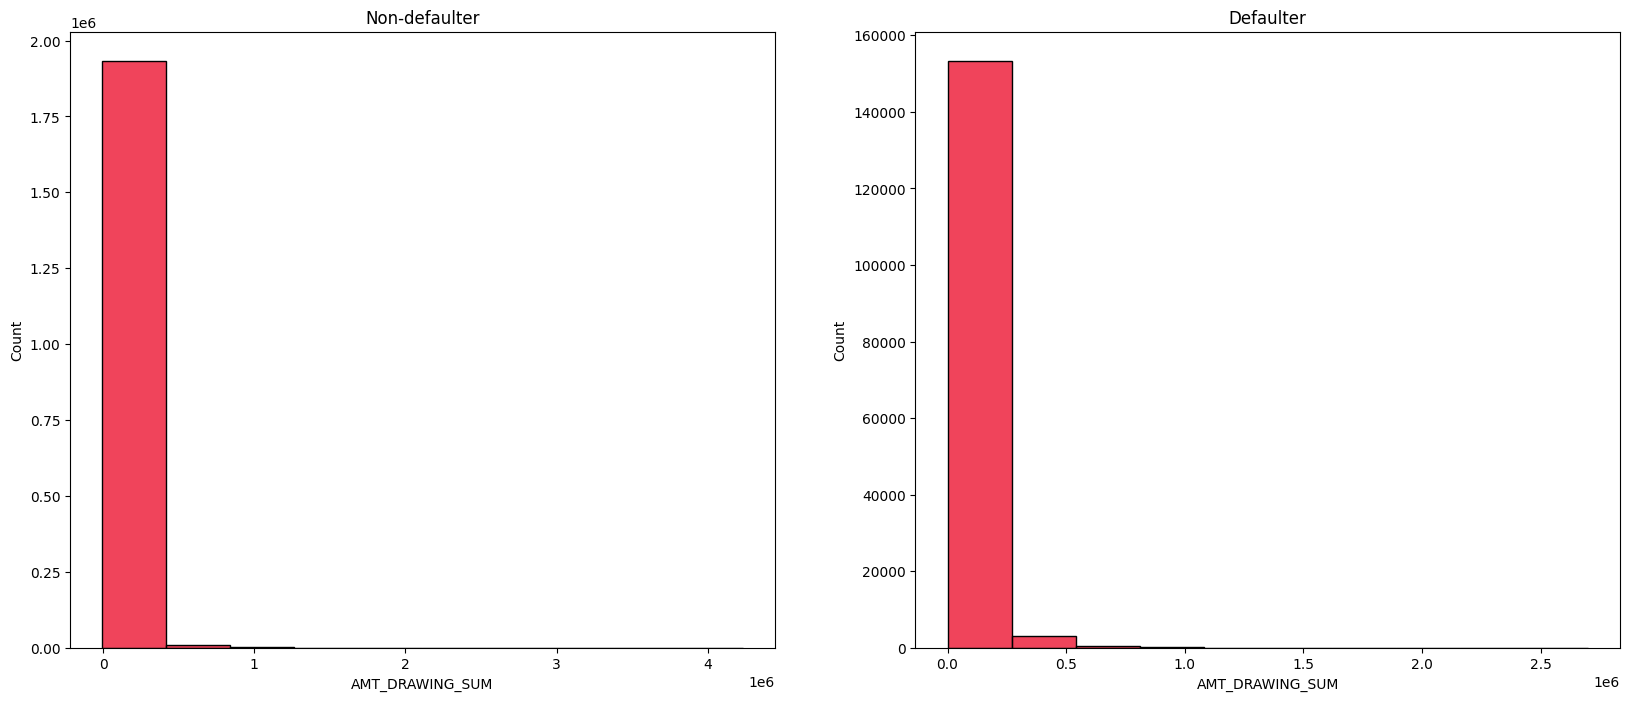

In [14]:
visualize.hist_plot(x='AMT_DRAWING_SUM', df1=cc_non_default, df2=cc_default,width=20, height=8, bins=10)

Nhận xét: đa số trong cả hai nhóm, khách hàng không dùng quá 50,000 USD


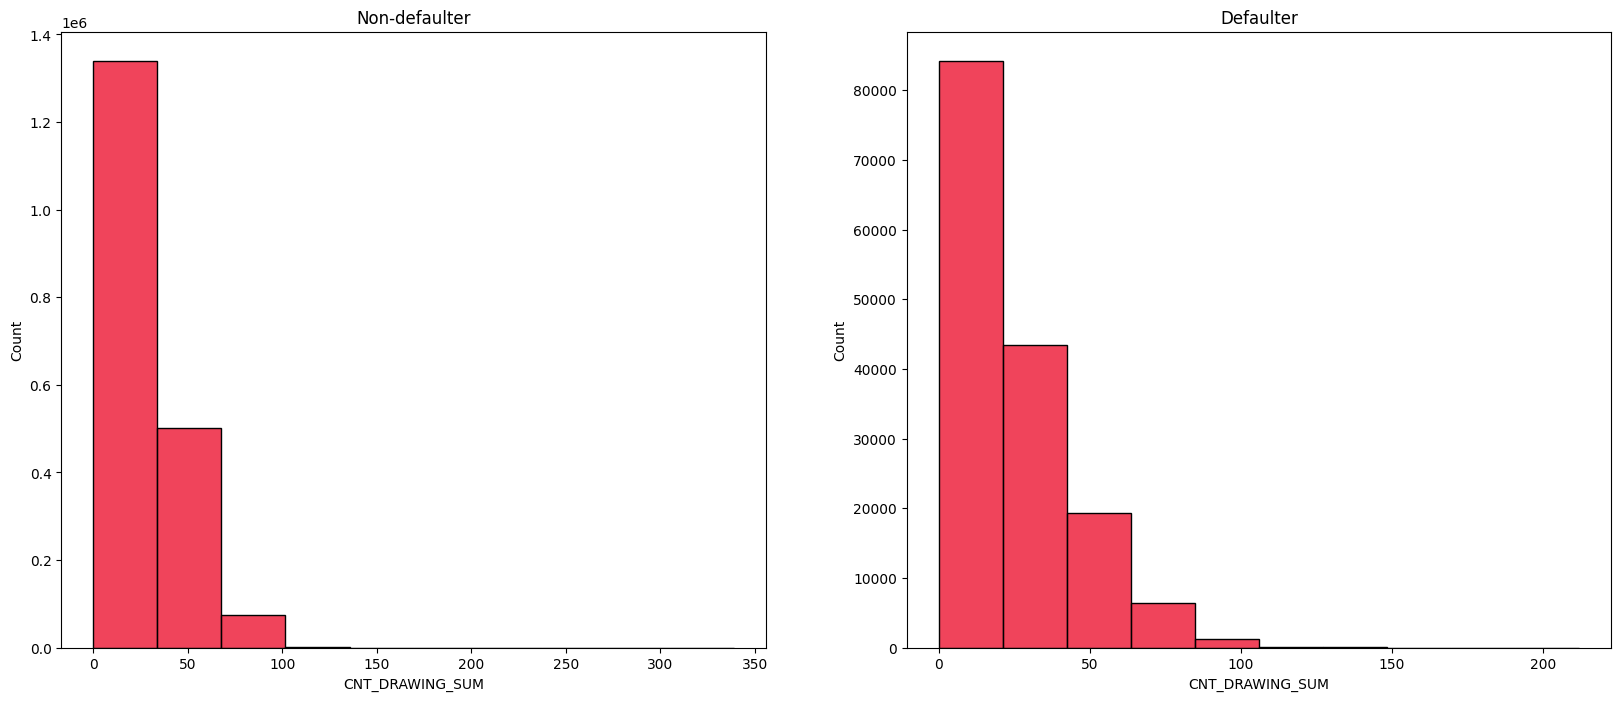

In [15]:
visualize.hist_plot(x='CNT_DRAWING_SUM', df1=cc_non_default, df2=cc_default,width=20, height=8, bins=10)

--> 2 Nhóm có tần suất rút tiền, sử dụng tiền tín dụng tương đối đều nhau

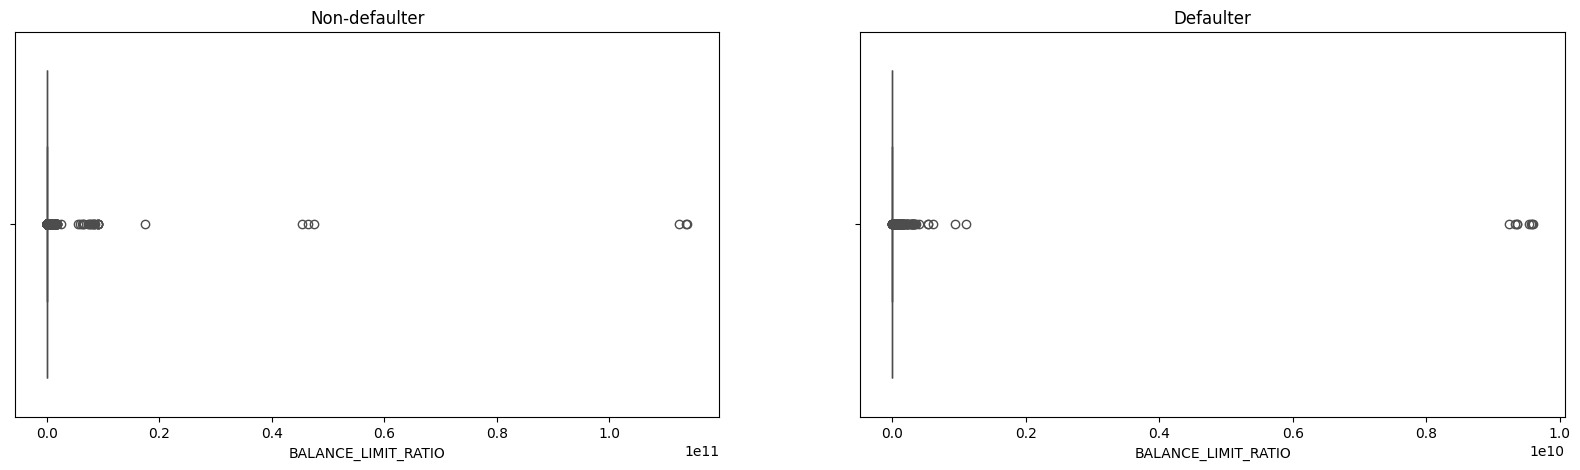

In [16]:
# Phần trăm hạn mức đã sử dụng:
visualize.box_plot2(x='BALANCE_LIMIT_RATIO', df1=cc_non_default, df2=cc_default, width=20, height=5)

In [17]:
n = len(cc_non_default[cc_non_default['BALANCE_LIMIT_RATIO'] <= 0.2])
print(n / len(cc_non_default))

0.6253415983469973


In [18]:
n = len(cc_default[cc_default['BALANCE_LIMIT_RATIO'] <= 0.2])
print(n / len(cc_default))

0.5516542623722144


--> Nhận xét: Chiếm phần nhiều mọi người dùng không quá 20% hạn mức (~62% với nhóm non-default và ~55% với nhóm non-default)